In [1]:
!pip install ultralytics opencv-python-headless --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00


In [8]:
from huggingface_hub import hf_hub_download


In [9]:
model_path = hf_hub_download(
    repo_id="AlekseyKorshuk/yolov11-face",
    filename="yolov11n-face.pt"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


yolov11n-face.pt:   0%|          | 0.00/5.46M [00:00<?, ?B/s]

In [18]:
from ultralytics import YOLO
from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

model = YOLO(model_path)

uploaded = files.upload()
for fn in uploaded.keys():
    img_path = fn


Saving images.png to images (1).png



image 1/1 /content/images (1).png: 480x640 6 faces, 110.4ms
Speed: 2.6ms preprocess, 110.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


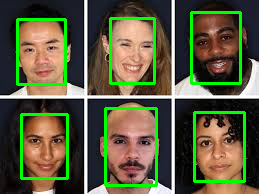

In [19]:
results = model(img_path)

img = results[0].orig_img.copy()


for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)


cv2_imshow(img)
